In [1]:
import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os

In [2]:
import torch
import matplotlib.pyplot as plt

Attention is all you need - Learning Rate Scheduling

\begin{equation}
lrate = d^{-0.5}_{model} \cdot min(step\_num^{-0.5}, step\_num \cdot warmup\_steps^{-1.5})
\end{equation}

This corresponds to increasing the learning rate linearly for the first *warmup_steps* training steps, and decreasing it thereafter proportionally to the inverse square root of the step number. In the paper was used *warmup_steps=4000*.

/tmp/ipykernel_1078686/3323218031.py:6: RuntimeWarning: divide by zero encountered in power
  val = (d_model**-0.5) * np.minimum(np.power(step, -0.5), step*np.power(warmup_steps, -1.5))


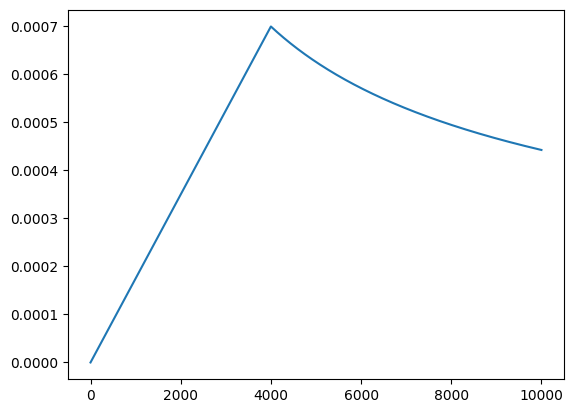

In [3]:
step = np.arange(0, 10000, 1)
step[0] = 1e-9
lrate = 0.0001

def lr_schedule(step, d_model=512, warmup_steps=4000):
    val = (d_model**-0.5) * np.minimum(np.power(step, -0.5), step*np.power(warmup_steps, -1.5))
    return val

# Plot the learning rate schedule
plt.plot(step, lr_schedule(step, 512))
plt.show()


/tmp/ipykernel_1078686/2055945696.py:8: RuntimeWarning: divide by zero encountered in power
  lambda1 = lambda step: np.minimum(np.power(step, -0.5), step*np.power(warmup_steps, -1.5))


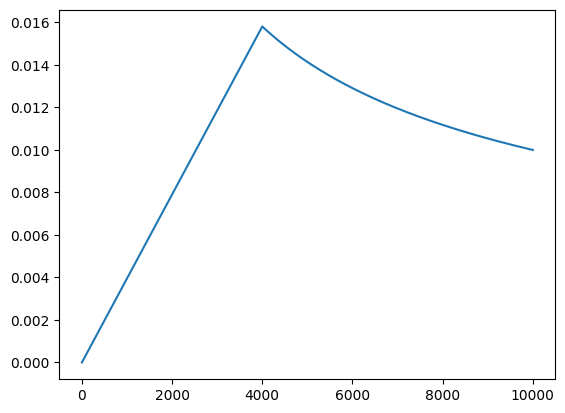

In [5]:
d_model = 512
warmup_steps = 4000
# lr0 = d_model**-0.5
lr0 = 1.0

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=lr0)
lambda1 = lambda step: np.minimum(np.power(step, -0.5), step*np.power(warmup_steps, -1.5))
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

lrs = []

global_step = -1
for epoch in range(1000):
    for step in range(10):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
    #     print("Factor = ", round(0.65 ** i,3)," , Learning Rate = ",round(optimizer.param_groups[0]["lr"],3))
        scheduler.step()
        global_step += 1

plt.plot(lrs)